1. Algorithms/Visualizations: Apply 5 different significant and relevant
algorithms (ML, MR, and/or statistical models) to your data and create visualizations for
the results. 
    - For 487 students: at least 1 of the 5 algorithms must be one that was not
discussed in class. 
    - For 587 students: at least 2 must be from outside of class. 
    - These outside algorithms can come from the class textbooks, or other sources. Cite the appropriate sources for each outside algorithm you choose to apply.
2. Explanation and Analysis: For each of the 5 above algorithms, provide
justification for why you chose the particular algorithm, and discuss the effectiveness of
the algorithm when applied to your data to answer questions related to your problem
statement. 
    - This should include discussion of any relevant metrics for demonstrating
model effectiveness, as well as any intelligence you were able to gain from application of
the algorithm to your data.


In [79]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor)
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pickle


One of the algorithms that is being used outside of class is Random Forest machine learning algorithm. We are also incorporating Bagging ensembler learning which is basically randomly splitting the data set into different versions with different entries selected and from there, the Random Forest is created through the best model of all the occurrences. That way, it will optimize the model to better predict the values. We wanted to use regular Decision Tree Regressors in the beginning; however, Random Forest Regressor was used in the end because Decision Trees tend to get overfitted quite easily so we wanted to apply Bagging to counteract that as well as including a training and testing portion. 

https://medium.com/nerd-for-tech/bootstrap-aggregating-and-random-forest-model-9460e235537
https://www.geeksforgeeks.org/random-forest-regression-in-python/
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


In [91]:
data = pd.read_csv('C:\\Users\\david\\Documents\\University at Buffalo\\Masters\\Fall 2022\\CSE 587\\CSE4-587Project\\Dataset\\ICP_Residential_Austin2017up.csv')
# Choosing the columns
data_columns_for_pca = data[[
'Remodel Repair SQFT', 'Total New Add SQFT','Total Valuation Remodel', 'Number Of Floors', 'Total Job Valuation',
'Total Lot SQFT']]

#Replacing the empty space with NaN and then deleting all the NaN
data_columns_for_pca = data_columns_for_pca.replace(r'^s*$', float('NaN'))
data_columns_for_pca.dropna(inplace = True)
print(data_columns_for_pca.shape)

#Selecting the columns that are categorical and converting it into numerical 
data_columns_for_pca = data_columns_for_pca[data_columns_for_pca['Total Job Valuation']>1000]
print(data_columns_for_pca.shape)


data_target = data_columns_for_pca['Total Job Valuation']
data_columns_for_pca.drop(columns='Total Job Valuation', inplace=True)

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(data_columns_for_pca, data_target, test_size=0.2, train_size=0.8)


(6819, 6)
(3870, 6)


[Text(0.5, 0.9, 'X[0] <= 4696.5\nsquared_error = 29180897415.872\nsamples = 3096\nvalue = 104710.106'),
 Text(0.25, 0.7, 'X[1] <= 882.5\nsquared_error = 18317941106.826\nsamples = 3063\nvalue = 97861.882'),
 Text(0.125, 0.5, 'X[2] <= 143500.0\nsquared_error = 9093821796.595\nsamples = 2592\nvalue = 73204.462'),
 Text(0.0625, 0.3, 'X[0] <= 515.5\nsquared_error = 7722745328.713\nsamples = 2505\nvalue = 66828.599'),
 Text(0.03125, 0.1, 'squared_error = 3166727240.621\nsamples = 1576\nvalue = 44844.05'),
 Text(0.09375, 0.1, 'squared_error = 13240899672.732\nsamples = 929\nvalue = 104124.238'),
 Text(0.1875, 0.3, 'X[2] <= 243750.0\nsquared_error = 13698936980.275\nsamples = 87\nvalue = 256785.356'),
 Text(0.15625, 0.1, 'squared_error = 7528654560.477\nsamples = 58\nvalue = 210355.621'),
 Text(0.21875, 0.1, 'squared_error = 13105179714.625\nsamples = 29\nvalue = 349644.828'),
 Text(0.375, 0.5, 'X[2] <= 440000.0\nsquared_error = 47321148278.685\nsamples = 471\nvalue = 233556.219'),
 Text(0.31

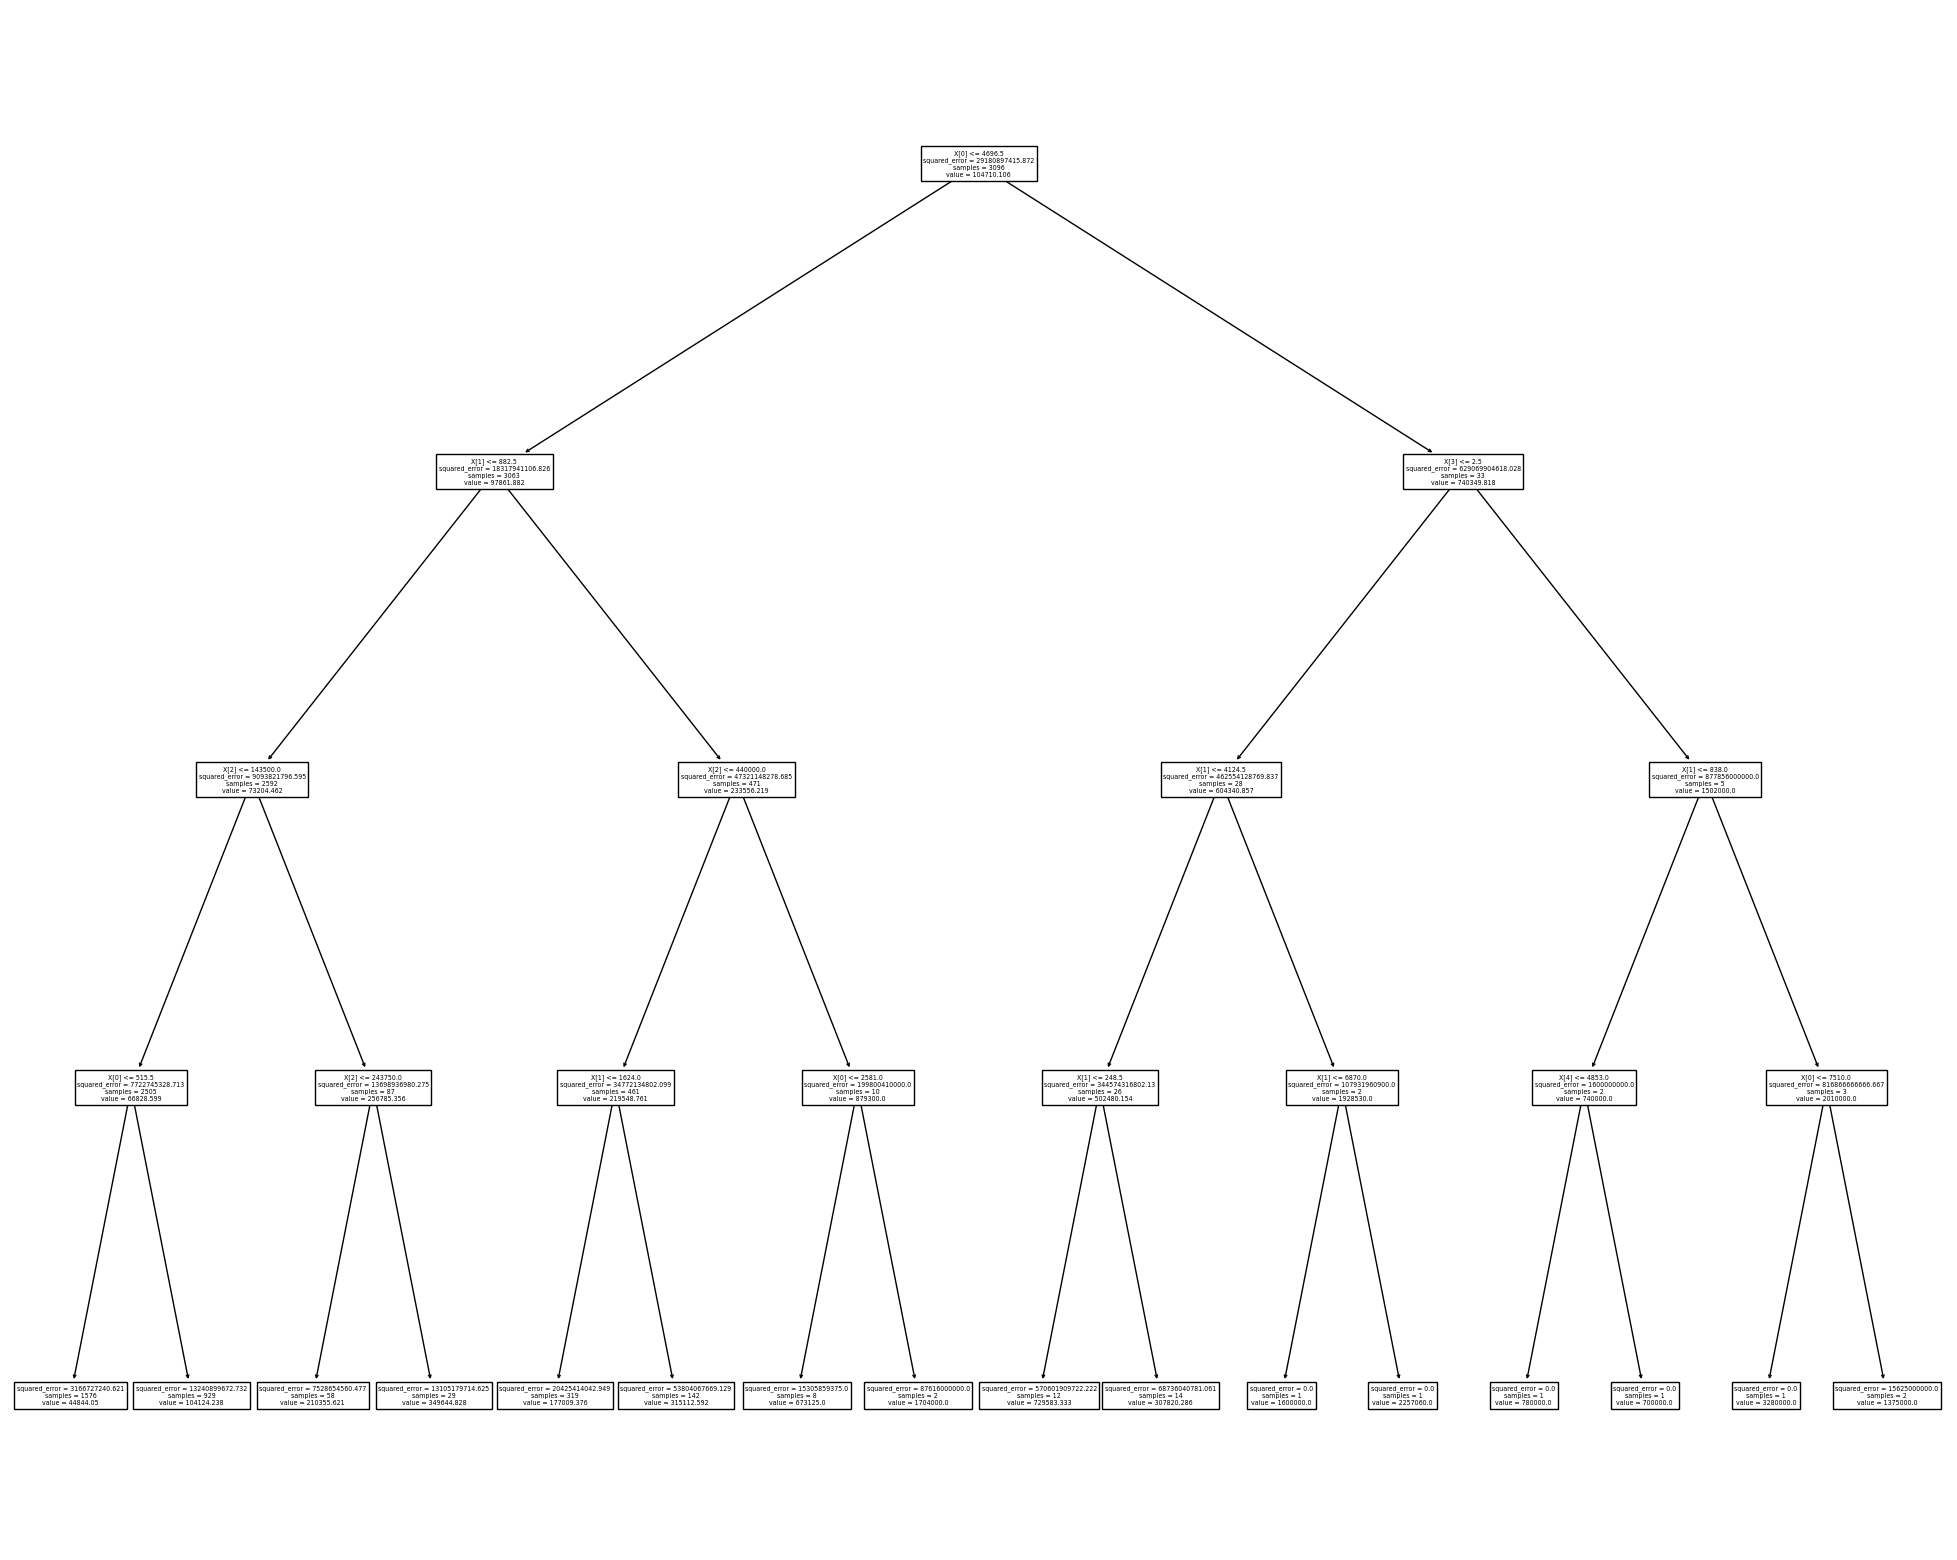

In [92]:
dt_max5 = DecisionTreeRegressor(max_depth=4)
dt_max5.fit(X_train_dt, y_train_dt)

y_dt_max5 = dt_max5.predict(X_test_dt)
plt.figure(figsize=(25,20))
tree.plot_tree(dt_max5)

In [93]:
mae_dt = metrics.mean_absolute_error(y_test_dt, y_dt_max5)
mse_dt = metrics.mean_squared_error(y_test_dt, y_dt_max5)
rmse_dt = np.sqrt(mse_dt) # or mse**(0.5)  
r2_dt = metrics.r2_score(y_test_dt,y_dt_max5)
r2_dt

0.39568528211809995

Text(0.5, 1.0, 'Feature Importance Decision Tree (MDI)')

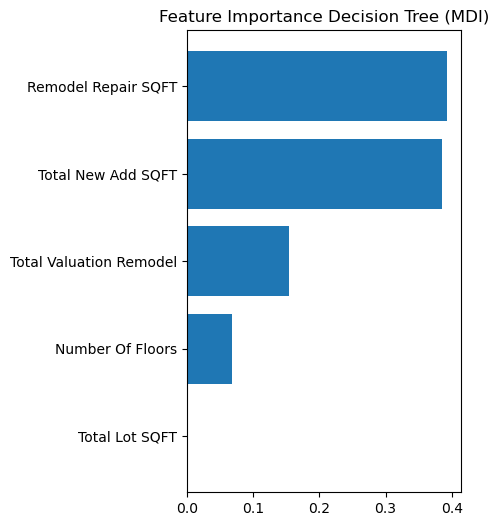

In [94]:
feature_importance = dt_max5.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(data_columns_for_pca.columns)[sorted_idx])
plt.title("Feature Importance Decision Tree (MDI)")

In [95]:
import pickle
rf_regression = RandomForestRegressor(bootstrap=True, max_depth=5, criterion="squared_error") # was 'squared_error', changed to 'mse' to run it for curr ver
rf_regression.fit(X_train_dt, y_train_dt)

filename = 'random_forest.sav'
pickle.dump(rf_regression, open(filename, 'wb'))

In [132]:
y_rf_max4 = rf_regression.predict(X_test_dt)

[Text(0.625, 0.9166666666666666, 'X[0] <= 6840.5\nsquared_error = 36904066061.749\nsamples = 1978\nvalue = 108382.071'),
 Text(0.4264705882352941, 0.75, 'X[1] <= 1337.5\nsquared_error = 20372747062.732\nsamples = 1969\nvalue = 100702.531'),
 Text(0.23529411764705882, 0.5833333333333334, 'X[0] <= 2803.5\nsquared_error = 11343996780.134\nsamples = 1820\nvalue = 82032.254'),
 Text(0.11764705882352941, 0.4166666666666667, 'X[2] <= 109500.0\nsquared_error = 7582724603.515\nsamples = 1750\nvalue = 73735.098'),
 Text(0.058823529411764705, 0.25, 'X[1] <= 523.5\nsquared_error = 6274791805.069\nsamples = 1674\nvalue = 67033.402'),
 Text(0.029411764705882353, 0.08333333333333333, 'squared_error = 4000265135.581\nsamples = 1313\nvalue = 51953.961'),
 Text(0.08823529411764706, 0.08333333333333333, 'squared_error = 10720452305.17\nsamples = 361\nvalue = 122191.0'),
 Text(0.17647058823529413, 0.25, 'X[2] <= 249900.0\nsquared_error = 12498398974.24\nsamples = 76\nvalue = 230925.786'),
 Text(0.14705882

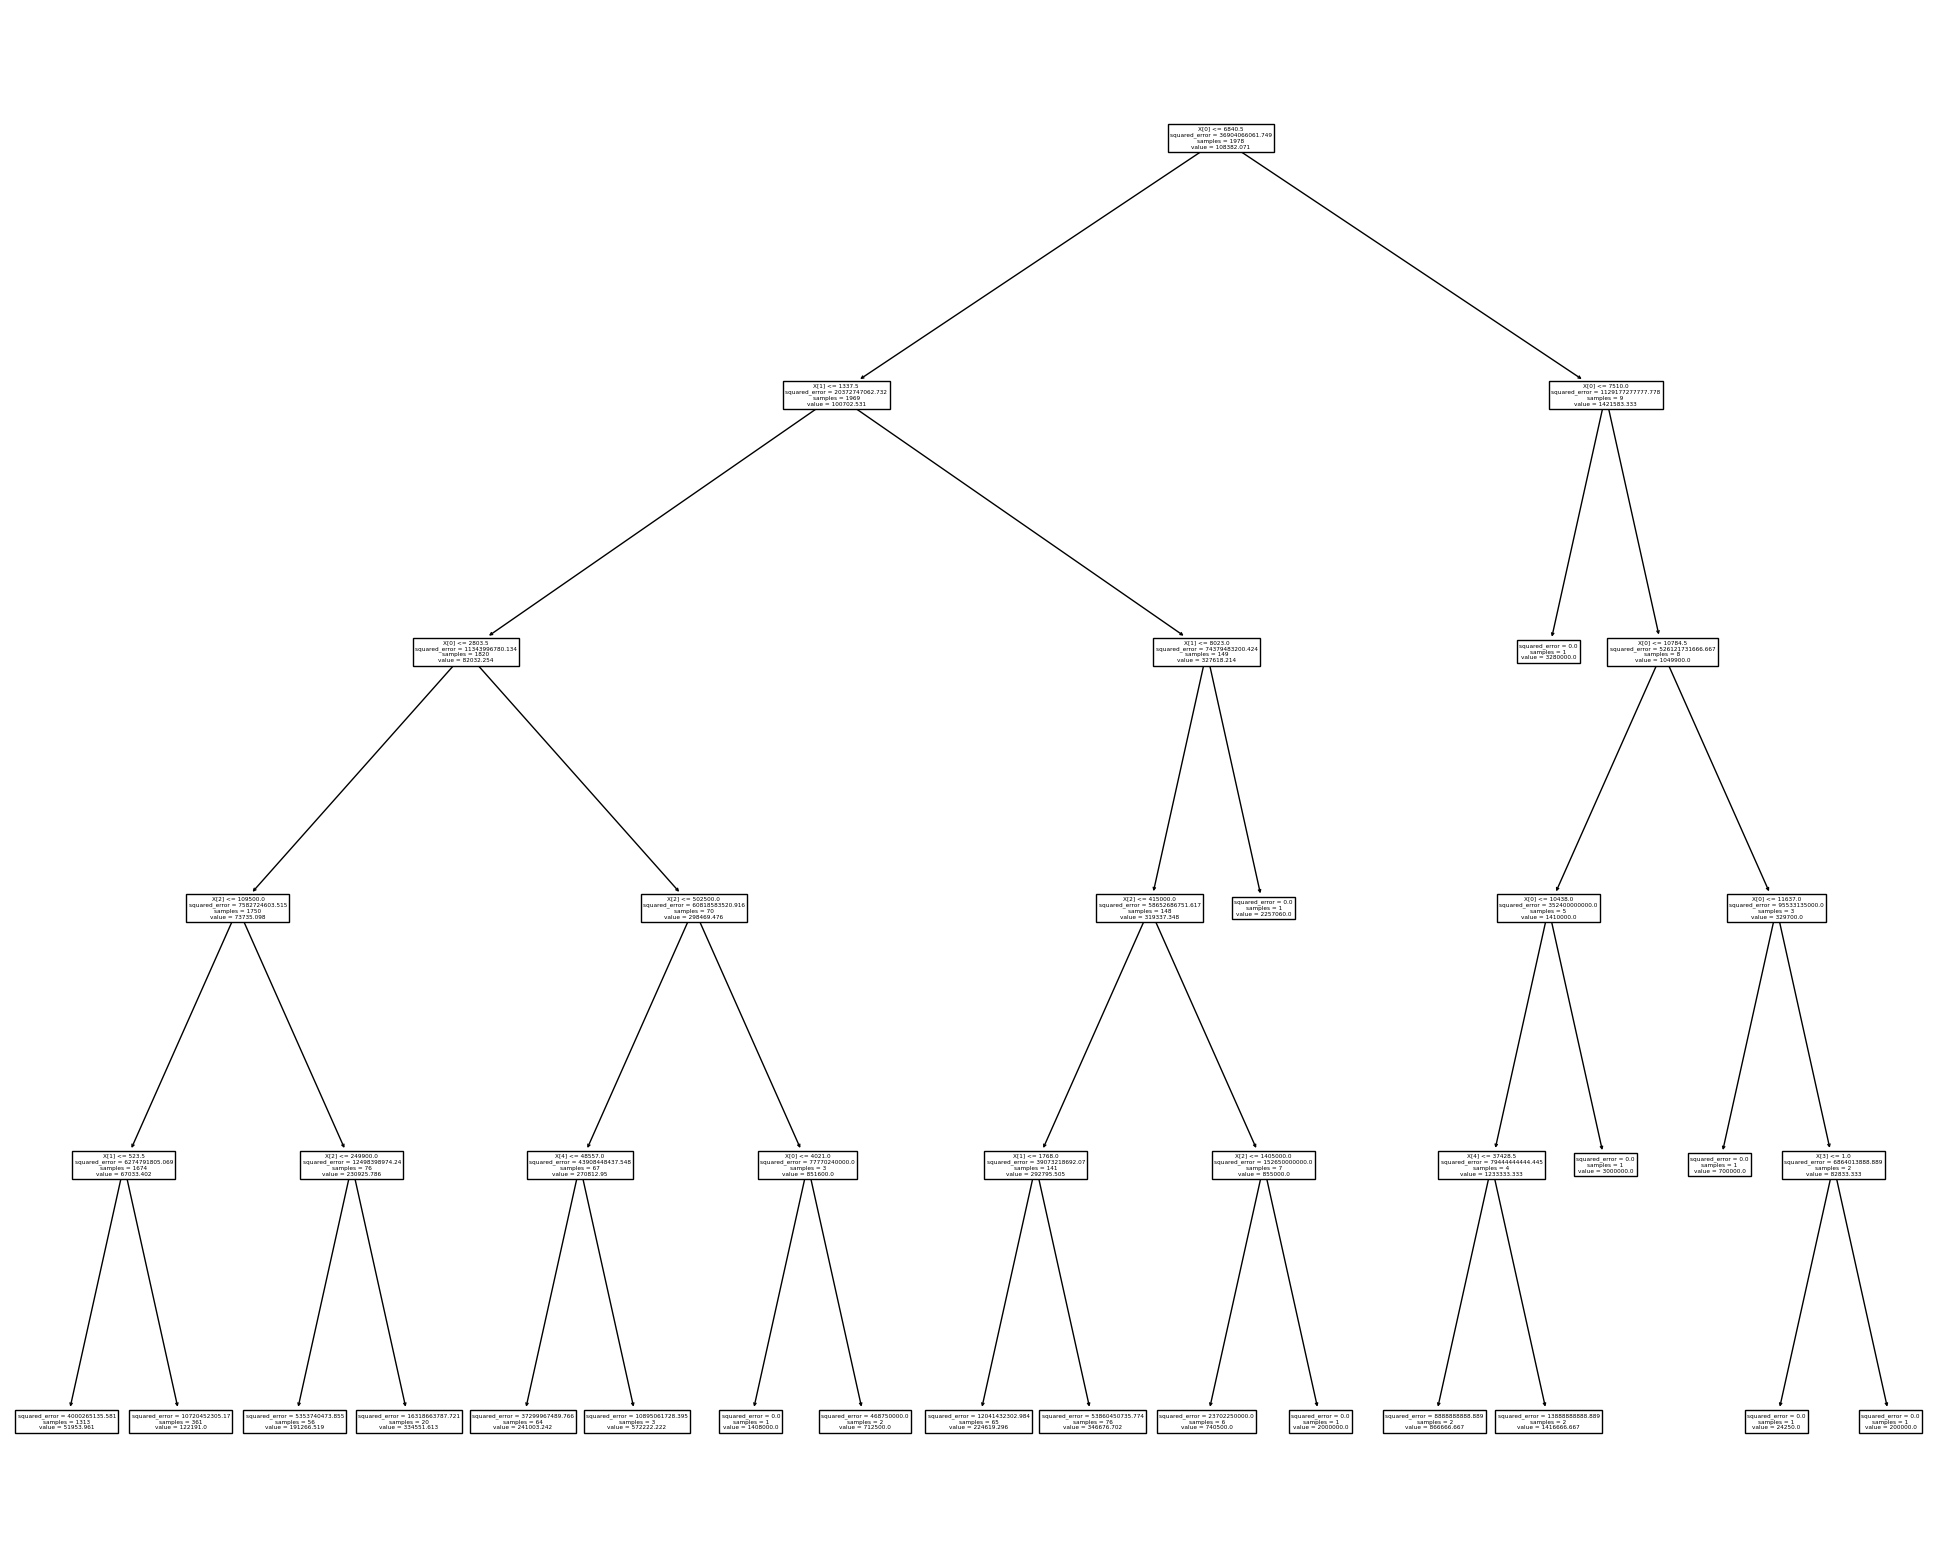

In [97]:
plt.figure(figsize=(25,20))
tree.plot_tree(rf_regression.estimators_[0])

In [98]:
mae_rf = metrics.mean_absolute_error(y_test_dt, y_rf_max4)
mse_rf = metrics.mean_squared_error(y_test_dt, y_rf_max4)
rmse_rf = np.sqrt(mse_rf) # or mse**(0.5)  
r2_rf = metrics.r2_score(y_test_dt,y_rf_max4)
r2_rf

0.5781640852823204

Text(0.5, 1.0, 'Random Forest (MDI)')

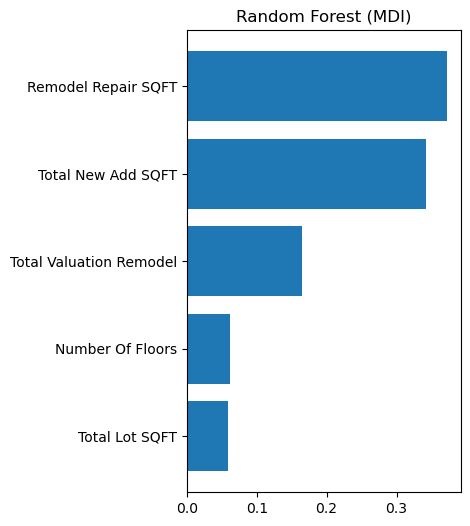

In [99]:
feature_importance = rf_regression.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(data_columns_for_pca.columns)[sorted_idx])
plt.title("Random Forest (MDI)")

In [101]:
gb_max = GradientBoostingRegressor(criterion="squared_error") # 'squared_error' => 'mse'
gb_max.fit(X_train_dt, y_train_dt)

filename = 'GradientBoosting.sav'
pickle.dump(gb_max, open(filename, 'wb'))

y_gb_max = gb_max.predict(X_test_dt)
plt.figure(figsize=(25,20))

mae_gb = metrics.mean_absolute_error(y_test_dt, y_gb_max)
mse_gb = metrics.mean_squared_error(y_test_dt, y_gb_max)
rmse_gb = np.sqrt(mse_gb) # or mse**(0.5)  
r2_gb = metrics.r2_score(y_test_dt,y_gb_max)
r2_gb

0.7048950434478344

<Figure size 2500x2000 with 0 Axes>

Text(0.5, 1.0, 'Gradient Boosting (MDI)')

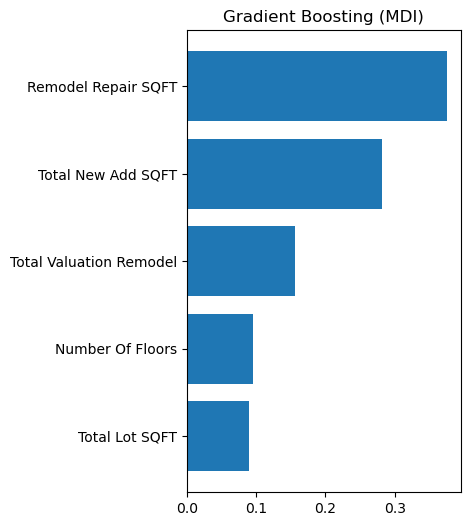

In [102]:
feature_importance = gb_max.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(data_columns_for_pca.columns)[sorted_idx])
plt.title("Gradient Boosting (MDI)")

# This figure is representing the features of importance to the 

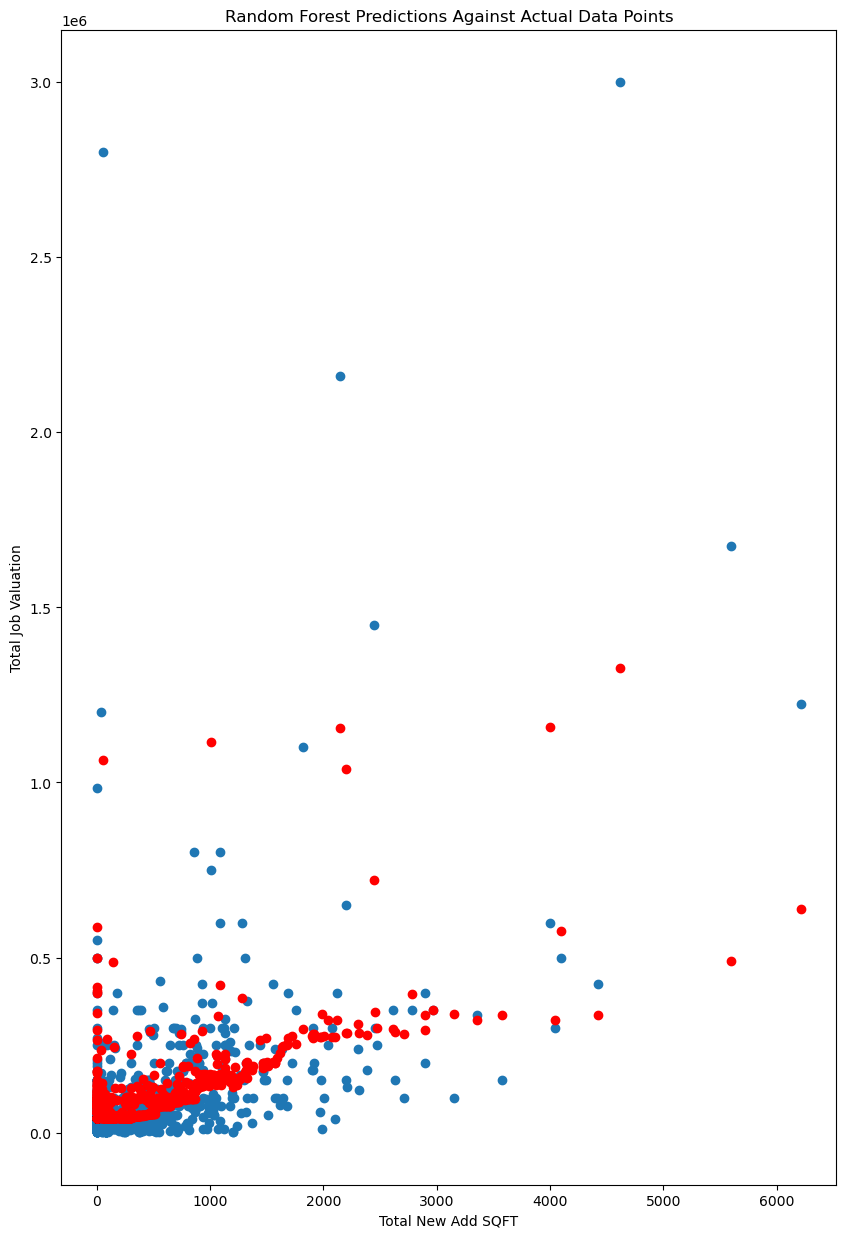

In [103]:
plt.figure(figsize=(10,15))
plt.xlabel('Total New Add SQFT')
plt.ylabel('Total Job Valuation')
plt.title('Random Forest Predictions Against Actual Data Points')
plt.scatter(X_test_dt.loc[:,"Total New Add SQFT"], y_test_dt)
plt.scatter(X_test_dt.loc[:,"Total New Add SQFT"], y_rf_max4, color="red")


Text(0.5, 1.0, 'RMSE vs MAE')

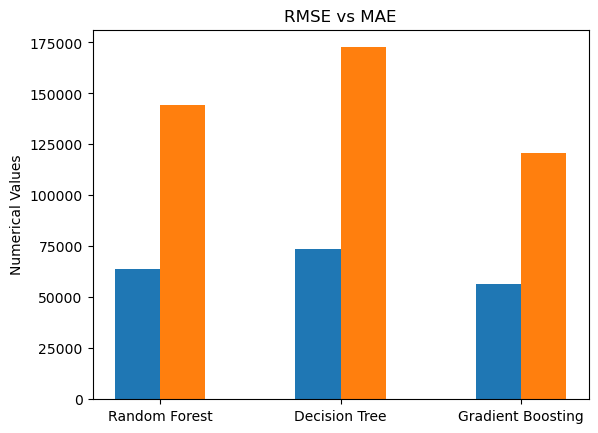

In [104]:
mae_comparison = [mae_rf, mae_dt, mae_gb]
mse_comparison = [mse_rf, mse_dt, mse_gb]
rmse_comparison = [rmse_rf, rmse_dt, rmse_gb]
r2_comparison = [r2_rf, r2_dt, r2_gb]

width = 0.25

labels = ["Random Forest", "Decision Tree", "Gradient Boosting"]
x_labels = np.arange(len(labels))
plt.bar(x_labels - 0.125, mae_comparison, width=width)
plt.bar(x_labels + 0.125, rmse_comparison, width=width)
plt.xticks(x_labels, labels)
plt.ylabel("Numerical Values")
plt.title("RMSE vs MAE")

# RMSE is highest one
# Notation here: the MSE values are wayyyyy tooo high! Unable to portray it on the same graph!
# Need to double check the R2 values and the data that is being used for the models because it seem to be that they aren't being done properly

Text(0.5, 1.0, 'R2 Comparison')

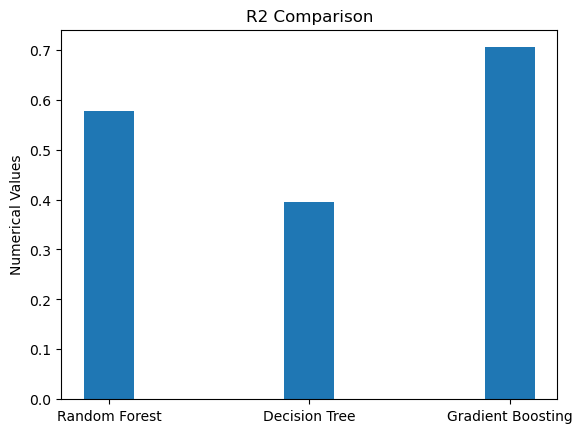

In [105]:
labels = ["Random Forest", "Decision Tree", "Gradient Boosting"]
x_labels = np.arange(len(labels))
plt.bar(x_labels, r2_comparison, width=width)
plt.xticks(x_labels, labels)
plt.ylabel("Numerical Values")
plt.title("R2 Comparison")

In [106]:
print("Results of sklearn.metrics for Decision Tree:")
print("MAE for Decision Tree:", mae_dt)
print("MSE for Decision Tree:", mse_dt)
print("RMSE for Decision Tree:", rmse_dt)
print("R-Squared for Decision Tree:", r2_dt)
print("")
print("Results of sklearn.metrics for Random Forest:")
print("MAE for Random Forest:", mae_rf)
print("MSE for Random Forest:", mse_rf)
print("RMSE for Random Forest:", rmse_rf)
print("R-Squared for Random Forest:", r2_rf)
print("")
print("Results of sklearn.metrics for Gradient Boosting:")
print("MAE for Gradient Boosting:", mae_gb)
print("MSE for Gradient Boosting:", mse_gb)
print("RMSE for Gradient Boosting:", rmse_gb)
print("R-Squared for Gradient Boosting:", r2_gb)

Results of sklearn.metrics for Decision Tree:
MAE for Decision Tree: 73831.76362265897
MSE for Decision Tree: 29787066389.907776
RMSE for Decision Tree: 172589.299754961
R-Squared for Decision Tree: 0.39568528211809995

Results of sklearn.metrics for Random Forest:
MAE for Random Forest: 63855.017357921424
MSE for Random Forest: 20792567226.20248
RMSE for Random Forest: 144196.2802093122
R-Squared for Random Forest: 0.5781640852823204

Results of sklearn.metrics for Gradient Boosting:
MAE for Gradient Boosting: 56615.1856642104
MSE for Gradient Boosting: 14545915683.834259
RMSE for Gradient Boosting: 120606.44959468071
R-Squared for Gradient Boosting: 0.7048950434478344
